## Pré-Processamento de Dados
[Anderson França](https://www.andersonfranca.me/)

Os dados do mundo real geralmente possuem inconsistências, estão incompletos, com muitos ruídos e informações faltantes. Ao utilizar modelos e algoritmos de aprendizado de máquinas nesses dados, os resultados podem ser inconsistentes ou mesmo direcionar as decisões para um caminho totalmente errado. Valores duplicados, ausentes ou outliers podem fornecer uma visão incorreta das análises gerais.  


As decisões de qualidade devem ser baseadas em dados corretos e consistentes e o **pré-processamento de dados** é uma das etapas mais importantes do aprendizado de máquinas e garante a qualidade dos dados. Na área de dados, se colocar dados ruins, teremos resultados ruins (*garbage in, garbage out*)



#### Vantagens de aplicar técnicas de pré-processamento de Dados

- **Melhorar a precisão do modelo**: Ao limpar e formatar os dados, podemos garantir que o algoritmo considere apenas informações relevantes e que não seja influenciado por dados irrelevantes ou incorretos.


- **Redução de tempo e recursos**: Ao remover dados irrelevantes ou redundantes, podemos reduzir a quantidade de dados que o algoritmo precisa processar, o que pode reduzir bastante a quantidade de tempo e recursos necessários para treinar o modelo.

- **Ajuda a evitar o overfitting**: O overfitting ocorre quando um modelo é treinado em um conjunto de dados muito específico e, como resultado, tem um bom desempenho nos dados de treinamento, mas é ruim em dados novos e não vistos. Ao pré-processar os dados e remover informações irrelevantes ou redundantes, podemos ajudar a reduzir o risco de overfitting e melhorar a capacidade do modelo de generalizar para novos dados.

- **Melhorar a interpretabilidade do modelo**: Ao limpar e formatar os dados, podemos facilitar a compreensão das relações entre diferentes variáveis e como elas estão influenciando as previsões do modelo.




Em resumo, o pré-processamento de dados é uma etapa essencial no processo de análise de dados que visa melhorar a qualidade e a precisão dos resultados da análise, tornando os dados mais acessíveis e fáceis de serem compreendidos.

### Carregar Base de Dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')

### Limpeza dos Dados

A limpeza dos dados é uma etapa do pré-processamento de dados que envolve a identificação e correção de dados incompletos, inconsistentes, incorretos, irrelevantes ou duplicados em um conjunto de dados. Esses dados inválidos ou irrelevantes podem ser gerados por erros humanos, falhas técnicas ou de software, ou até mesmo por problemas no processo de coleta dos dados.

A limpeza dos dados envolve várias técnicas, como a remoção de valores duplicados, preenchimento de valores faltantes, correção de erros de digitação, normalização de dados, entre outras.

## Valores faltantes

Tratar os valores faltantes é uma tarefa essencial durante o pré-processamento de dados, pois, valores faltantes podem prejudicar o resultado final do modelo. Antes de iniciar o tratamento dos dados faltantes, é preciso identificar o motivo desses valores faltantes e se há algum valor determinado para esses casos.

Uma vez que já sabemos um pouco mais sobre esses valores faltantes, é necessário decidir se serão substituídos ou não, e qual o valor que deverá ser adicionado.  Aqui estão algumas alternativas para trabalhar com esses valores faltantes:


- Valores como “Não disponível” ou “NA” podem ser utilizados para substituir os valores ausentes.
- Substituir os valores manualmente, o que é inviável para grandes conjuntos de dados.
- Utilizar o valor médio/mediano da variável.
- Utilizar um algoritmo (ex. Árvore de Decisão) para definir o valor mais provável

É importante lembrar que a escolha da técnica de tratamento de valores faltantes deve ser baseada nas características do conjunto de dados e no tipo de análise que será realizada. Além disso, é recomendável que os dados tratados sejam avaliados para verificar se a técnica escolhida não gerou novos problemas, como distorção ou perda de informação.





Antes de começar a tratar os valores faltantes, é necessário avaliar onde estão os dados ausentes. Podemos indentificá-los da seguinte forma:

In [ ]:
base_dados.isnull().sum()

SEXO            0
ESPEC           0
DIAR_ACOM       0
QT_DIARIAS      0
VAL_SH          1
VAL_SP          3
US_TOT          2
DT_INTER        0
ESCOLARIDADE    0
IDADE           0
DIAS_PERM       0
MORTE           0
NACIONAL        4
GESTRISCO       0
munResNome      2
dtype: int64

Linhas ou colunas com muitos valores ausentes não significativos podem ser excluídas com a função **dropna** dos pandas. Os parâmetros mais importantes da função são:

- axis: 0 para linhas, 1 para colunas
- inplace: atualizar os dados

In [ ]:
#Excluir TODAS as observações que contenham NA
base_dados.dropna()

,SEXO,ESPEC,DIAR_ACOM,QT_DIARIAS,VAL_SH,VAL_SP,US_TOT,DT_INTER,ESCOLARIDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,GESTRISCO,munResNome
3,Masculino,Clínicos,1,1,88533.96,13344.37,21584.39,2021-09-16,MEDIO,65,128,1,Brasil,Sim,Campos dos Goytacazes
5,Feminino,Pediátricos,0,1,57614.44,11170.34,14573.04,2021-11-26,FUNDAMENTAL,0,143,0,Brasil,Sim,Rio de Janeiro
7,Feminino,Pediátricos,0,31,49557.64,12725.43,13195.56,2021-08-14,SUPERIOR,0,190,0,Brasil,Sim,Rio de Janeiro
12,Masculino,Pediátricos,0,1,39598.99,6463.26,9758.95,2021-12-14,SUPERIOR,0,90,0,Brasil,Sim,Queimados


Note que a função retirou todas as variáveis que continham valores faltantes. Para excluir uma coluna que possui valores faltantes, basta alterar o argumento **_axis_**

In [ ]:
#Excluir Colunas com NA
base_dados.dropna(axis=1)

,SEXO,ESPEC,DIAR_ACOM,QT_DIARIAS,DT_INTER,ESCOLARIDADE,IDADE,DIAS_PERM,MORTE,GESTRISCO
0,Feminino,Cirúrgico,0,73,2021-06-30,FUNDAMENTAL,56,297,1,Sim
1,Masculino,Pediátricos,0,0,2021-08-20,MEDIO,2,200,1,Não
2,Feminino,Pediátricos,0,21,2021-09-25,SUPERIOR,0,167,0,Sim
3,Masculino,Clínicos,1,1,2021-09-16,MEDIO,65,128,1,Sim
4,Feminino,Pediátricos,0,1,2021-10-29,SUPERIOR,26,126,0,Sim
5,Feminino,Pediátricos,0,1,2021-11-26,FUNDAMENTAL,0,143,0,Sim
6,Masculino,Pediátricos,13,13,2021-10-01,MEDIO,10,122,0,Sim
7,Feminino,Pediátricos,0,31,2021-08-14,SUPERIOR,0,190,0,Sim
8,Feminino,Pediátricos,0,1,2021-12-02,MEDIO,1,105,0,Sim
9,Masculino,Pediátricos,1,1,2021-11-18,SUPERIOR,1,102,0,Não


Por enquanto, os valores faltantes foram retirados apenas na visão temporária dos dados. Para alterar o valor do objeto original, basta utilizar o argumento **inplace=True**

In [ ]:
#Remover os valores faltantes direto na base de dados
base_dados.dropna(inplace=True)

Após a substituição dos valores faltantes, agora é só atualizar o valor do index utilizando a função **reset_index**

In [ ]:
base_dados.reset_index(inplace=True) #atualizar o índice da base de dados

In [ ]:
base_dados

,index,SEXO,ESPEC,DIAR_ACOM,QT_DIARIAS,VAL_SH,VAL_SP,US_TOT,DT_INTER,ESCOLARIDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,GESTRISCO,munResNome
0,3,Masculino,Clínicos,1,1,88533.96,13344.37,21584.39,2021-09-16,MEDIO,65,128,1,Brasil,Sim,Campos dos Goytacazes
1,5,Feminino,Pediátricos,0,1,57614.44,11170.34,14573.04,2021-11-26,FUNDAMENTAL,0,143,0,Brasil,Sim,Rio de Janeiro
2,7,Feminino,Pediátricos,0,31,49557.64,12725.43,13195.56,2021-08-14,SUPERIOR,0,190,0,Brasil,Sim,Rio de Janeiro
3,12,Masculino,Pediátricos,0,1,39598.99,6463.26,9758.95,2021-12-14,SUPERIOR,0,90,0,Brasil,Sim,Queimados


**ATENÇÃO**: Remover os valores faltantes pode levar à perda de informação e, portanto, deve ser usada com cautela. Além disso, é recomendável avaliar se a quantidade de dados removidos não afetou significativamente a análise dos dados. Para alguns casos, pode ser mais adequado preencher os valores faltantes com medidas estatísticas ou usar técnicas de imputação de dados.

## Imputação de dados

Durante o processo de tratamento dos dados, muitas vezes excluir uma observação não é uma opção viável, pois, podemos perder informações relevantes para nosso estudo. Por isso, é importante utilizar alguma técnica de imputação de dados para viabilizar o uso dessas observações.

A imputação de dados é uma técnica de pré-processamento de dados que consiste em preencher valores ausentes em um conjunto de dados utilizando valores estimados, com base em informações disponíveis nos próprios dados ou em outras fontes.


Existem muitas técnicas de imputação de dados, entre elas:

- **Utilizar a média, mediana ou moda**: Nesse método, substitui-se os valores faltante por alguma métrica de posição de cada variável. É uma técnica simples e rápida de ser implementada, mas pode gerar distorções nos dados se os valores ausentes estiverem concentrados em uma determinada faixa de valores ou se houver um volume muito alto de valores ausentes.

- **Imputação por regressão**: Utiliza-se a regressão linear para estimar os valores ausentes com base nas demais variáveis do conjunto de dados. É uma técnica mais complexa do que o preenchimento por média, mediana ou moda, mas pode gerar estimativas mais precisas, especialmente se houver relação linear entre as variáveis.

- **K-vizinhos mais próximos (K-NN)**: essa técnica consiste em preencher os valores ausentes utilizando os vizinhos mais próximos em um conjunto de dados. É uma técnica que leva em conta a relação entre as observações, mas pode gerar estimativas imprecisas se o conjunto de dados for muito grande ou se houver muitos valores ausentes.

- **Imputação por modelo**: Utiliza-se modelos de aprendizado de máquina para estimar os valores faltantes. É uma técnica que pode gerar estimativas precisas se o modelo utilizado for adequado, mas também pode ser computacionalmente intensiva e requerer um conjunto de dados grande o suficiente para treinar o modelo.

A escolha da técnica de imputação de dados mais adequada depende das características da base, do tipo de análise a ser realizada e da quantidade de valores ausentes no conjunto de dados. É importante avaliar se a técnica de imputação de dados escolhida não gerou distorções ou perda de informação nos dados.

### Variáveis numéricas

Uma maneira simples de fazer imput de dados com variáveis numéricas é preenchê-los com a média dos valores da variável. Para isso, podemos utilizar o método **fillna()** do Pandas da seguinte forma:

#### Utilizando a média

In [ ]:
#Carregar a base de dados contendo valores faltantes
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')

print('A média de VAL_SP é: ',base_dados['VAL_SP'].mean())
base_dados[['VAL_SP']].head(10)

A média de VAL_SP é:  9442.526363636363


,VAL_SP
0,4995.70
1,4265.16
2,NaN
3,13344.37
4,8670.39
5,11170.34
6,NaN
7,12725.43
8,7546.86
9,20357.40


Note que em nossa base de dados, temos diversos valores faltantes para algumas variáveis numéricas. Para substituir esses valores faltantes pela média, podemos utilizar as funções **fillna()** e o **mean()**

In [ ]:
base_dados['VAL_SP'].fillna(base_dados['VAL_SP'].mean(),inplace=True)

In [ ]:
print('A média de VAL_SP é: ',base_dados['VAL_SP'].mean())
base_dados[['VAL_SP']].head(10)

A média de VAL_SP é:  9442.526363636363


,VAL_SP
0,4995.700000
1,4265.160000
2,9442.526364
3,13344.370000
4,8670.390000
5,11170.340000
6,9442.526364
7,12725.430000
8,7546.860000
9,20357.400000


Embora a imputação de dados por média seja uma técnica simples e muito utilizada para valores faltantes em variáveis numéricas, ela pode apresentar algumas limitações e problemas como:

- Perda de Variabilidade
- Distorção da distribuição
- Viés de Amostragem
- Sensibilidade a outliers

É importante avaliar cuidadosamente as limitações e os problemas da imputação por média antes de decidir utilizá-la como técnica de imputação de dados.

#### Utilizando modelos

##### KNN
Outra maneira de fazer imput de dados com variáveis numéricas é usar o algoritmo K-NN para estimar os valores ausentes com base nos valores de outras amostras semelhantes.

In [ ]:
#Carregar a base de dados contendo valores faltantes
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

Nesse exemplo, estamos usando o K-NN com n_neighbors=3, ou seja, estamos considerando as três amostras mais próximas para estimar os valores ausentes. O método **fit_transform()** retorna um novo array com os valores estimados, que é então atribuído de volta à coluna 'VAL_SP' da base de dados.

In [ ]:
#aplicar o KNNImputer
base_dados[['VAL_SP']] = imputer.fit_transform(base_dados[['VAL_SP']])

In [ ]:
#Visualizar a variável
print('A média de VAL_SP é: ',base_dados['VAL_SP'].mean())
base_dados[['VAL_SP']].head(10)

A média de VAL_SP é:  9442.526363636363


,VAL_SP
0,4995.700000
1,4265.160000
2,9442.526364
3,13344.370000
4,8670.390000
5,11170.340000
6,9442.526364
7,12725.430000
8,7546.860000
9,20357.400000


### Variáveis Categóricas


Existem várias técnicas para imputação de valores faltantes em variáveis categóricas, como por exemplo:
- Imputação por moda
- Imputação por KNN
- Imputação por regressão logística
- Imputação por correspondência
- E muitas outras formas.

Cada técnica tem suas próprias vantagens e desvantagens e pode ser mais ou menos adequada para diferentes conjuntos de dados e objetivos de análise. É importante avaliar cuidadosamente as opções disponíveis e escolher a técnica de imputação mais apropriada para cada caso específico.

Uma das formas mais utilizadas para preencher os valores faltantes de uma variável categórica, é utilizando a substituição por um valor pré-determinado, por exemplo:

In [ ]:
#Carregar a base de dados contendo valores faltantes
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')

In [ ]:
print(base_dados[['munResNome']].value_counts(dropna=False))
print('\n',base_dados[['NACIONAL']].value_counts(dropna=False))

munResNome           
Rio de Janeiro           3
Natividade               2
NaN                      2
Campos dos Goytacazes    1
Magé                     1
Nova Friburgo            1
Nova Iguaçu              1
Queimados                1
São Gonçalo              1
Valença                  1
dtype: int64

 NACIONAL
Brasil      10
NaN          4
dtype: int64


In [ ]:
# Substituição por um valor definido em cada coluna
base_dados = base_dados.fillna({'munResNome': 'Rio de Janeiro', 'NACIONAL': 'Brasil'})

In [ ]:
print(base_dados[['munResNome']].value_counts(dropna=False))
print('\n',base_dados[['NACIONAL']].value_counts(dropna=False))

munResNome           
Rio de Janeiro           5
Natividade               2
Campos dos Goytacazes    1
Magé                     1
Nova Friburgo            1
Nova Iguaçu              1
Queimados                1
São Gonçalo              1
Valença                  1
dtype: int64

 NACIONAL
Brasil      14
dtype: int64


## Transformação dos Dados

A Transformação de dados tem como objetivo modificar a distribuição ou formato dos dados para torná-los mais adequados para análise. As transformações de dados podem ser necessárias por vários motivos, incluindo:

- Reduzir a variabilidade nos dados e torná-los mais homogêneos;
- Melhorar a normalidade dos dados, o que é importante para muitas análises estatísticas;
- Facilitar a interpretação dos dados;
- Tornar os dados mais adequados para um determinado modelo de análise.


Algumas das técnicas mais utilizadas para a transformação de dados incluem:

**Normalização:** É útil para evitar que uma variável com uma escala maior domine a análise.

**Padronização:** Técnica parecida com a normalização, mas envolve a transformação dos dados para ter uma distribuição normal padrão com média zero e desvio padrão igual a um.

**Transformação logarítmica:** Muito utilizada para transformar dados positivos assimétricos para torná-los mais simétricos. Isso é útil para análises estatísticas que pressupõem normalidade dos dados.

**Discretização:** Técnica que consiste em transformar variáveis contínuas em variáveis discretas. Isso pode ser útil para reduzir a complexidade dos dados ou para torná-los mais adequados para um determinado modelo de análise.


Além dessas técnicas, existem muitos outros métodos de transformação de dados que podem ser utilizadas para ajudar a tornar os dados mais adequados para análise. A escolha da técnica dependerá dos objetivos específicos da análise e das características dos dados que estão sendo analisados.

### Normalização e padronização


#### **Escalonamento padrão**:
Técnica de normalização que transforma os dados para que eles possuam uma distribuição normal padrão com média zero e desvio padrão igual a um.

In [ ]:
#Carregar a base de dados contendo valores numéricos
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')
base_dados[['VAL_SH','VAL_SP','US_TOT']].head()

,VAL_SH,VAL_SP,US_TOT
0,30025.18,4995.70,7419.67
1,27108.84,4265.16,6647.03
2,90108.26,NaN,22458.59
3,88533.96,13344.37,21584.39
4,55547.98,8670.39,NaN


In [ ]:
#Utilizando o sklearn para a padronização
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(base_dados[['VAL_SH','VAL_SP','US_TOT']]) #aplicar a padronização

base_dados[['VAL_SH','VAL_SP','US_TOT']] = dados_padronizados #salvar na base de dados original

In [ ]:
base_dados.head()

,SEXO,ESPEC,DIAR_ACOM,QT_DIARIAS,VAL_SH,VAL_SP,US_TOT,DT_INTER,ESCOLARIDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,GESTRISCO,munResNome
0,Feminino,Cirúrgico,0,73,-1.284153,-0.997986,-1.295109,2021-06-30,FUNDAMENTAL,56,297,1,Brasil,Sim,NaN
1,Masculino,Pediátricos,0,0,-1.432845,-1.161939,-1.451942,2021-08-20,MEDIO,2,200,1,Brasil,Não,NaN
2,Feminino,Pediátricos,0,21,1.779222,NaN,1.757533,2021-09-25,SUPERIOR,0,167,0,Brasil,Sim,São Gonçalo
3,Masculino,Clínicos,1,1,1.698955,0.875678,1.580085,2021-09-16,MEDIO,65,128,1,Brasil,Sim,Campos dos Goytacazes
4,Feminino,Pediátricos,0,1,0.017143,-0.173288,NaN,2021-10-29,SUPERIOR,26,126,0,Brasil,Sim,Magé


#### **Escalonamento mínimo-máximo (MinMax):**
Técnica de normalização de variáveis que dimensiona todos os valores de uma variável para uma faixa entre 0 e 1.

In [ ]:
#Carregar a base de dados contendo valores numéricos
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')
base_dados[['VAL_SH','VAL_SP','US_TOT']].head()

,VAL_SH,VAL_SP,US_TOT
0,30025.18,4995.70,7419.67
1,27108.84,4265.16,6647.03
2,90108.26,NaN,22458.59
3,88533.96,13344.37,21584.39
4,55547.98,8670.39,NaN


In [ ]:
from sklearn.preprocessing import MinMaxScaler #Carregar a função

scaler = MinMaxScaler() #Definir os parâmetros da função
dados_padronizados = scaler.fit_transform(base_dados[['VAL_SH','VAL_SP','US_TOT']]) #aplicar o minmax

base_dados[['VAL_SH','VAL_SP','US_TOT']] = dados_padronizados #salvar na base de dados original

In [ ]:
base_dados[['VAL_SH','VAL_SP','US_TOT']].head()

,VAL_SH,VAL_SP,US_TOT
0,0.046292,0.045397,0.048866
1,0.000000,0.000000,0.000000
2,1.000000,NaN,1.000000
3,0.975011,0.564198,0.944711
4,0.451419,0.273749,NaN


### Variáveis catetegóricas

Normalização e padronização geralmente se referem a técnicas de pré-processamento de dados usadas para tratar variáveis **numéricas contínuas**, e não são aplicáveis diretamente a variáveis categóricas.

Para algumas técnicas de modelagem, é necessário que todas as variáveis sejam numéricas. Nesses casos, podemos converter variáveis categóricas em numéricas usando técnicas como codificação one-hot ou codificação ordinal.

#### Codificação da variável (Label Encoder)

In [ ]:
#Carregar a base de dados contendo valores numéricos
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')
base_dados[['SEXO']].head()

,SEXO
0,Feminino
1,Masculino
2,Feminino
3,Masculino
4,Feminino


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
base_dados['SEXO'] = label_encoder.fit_transform(base_dados['SEXO'])
base_dados[['SEXO']].head()

,SEXO
0,0
1,1
2,0
3,1
4,0


#### Codificação variável ordinal

A codificação de variáveis ordinais é parecida com a codificação de variáveis categóricas, mas a ordem das categorias deve ser levada em consideração.

In [ ]:
#Carregar a base de dados contendo valores numéricos
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')
base_dados[['ESCOLARIDADE']].head()

,ESCOLARIDADE
0,FUNDAMENTAL
1,MEDIO
2,SUPERIOR
3,MEDIO
4,SUPERIOR


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
to = OrdinalEncoder(categories=[['FUNDAMENTAL','MEDIO','SUPERIOR']])

In [ ]:
base_dados[['ESCOLARIDADE']] = to.fit_transform(base_dados[['ESCOLARIDADE']])
base_dados[['ESCOLARIDADE']].head()

,ESCOLARIDADE
0,0.0
1,1.0
2,2.0
3,1.0
4,2.0


#### Codificação One-Hot

A codificação one-hot (também conhecida como codificação de variáveis categóricas nominais) é uma técnica usada para transformar variáveis categóricas em variáveis numéricas binárias. Cada categoria da variável categórica é transformada em uma nova variável binária que indica se a observação pertence ou não a essa categoria. Podemos utilizar a função **get_dummies()** do pandas para essa transformação.

In [ ]:
#Carregar a base de dados contendo valores numéricos
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')
base_dados[['SEXO']].head()

,SEXO
0,Feminino
1,Masculino
2,Feminino
3,Masculino
4,Feminino


In [ ]:
base_dados = pd.get_dummies(base_dados,columns=['SEXO'])

In [ ]:
base_dados.head()

,ESPEC,DIAR_ACOM,QT_DIARIAS,VAL_SH,VAL_SP,US_TOT,DT_INTER,ESCOLARIDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,GESTRISCO,munResNome,SEXO_Feminino,SEXO_Masculino
0,Cirúrgico,0,73,30025.18,4995.70,7419.67,2021-06-30,FUNDAMENTAL,56,297,1,Brasil,Sim,NaN,1,0
1,Pediátricos,0,0,27108.84,4265.16,6647.03,2021-08-20,MEDIO,2,200,1,Brasil,Não,NaN,0,1
2,Pediátricos,0,21,90108.26,NaN,22458.59,2021-09-25,SUPERIOR,0,167,0,Brasil,Sim,São Gonçalo,1,0
3,Clínicos,1,1,88533.96,13344.37,21584.39,2021-09-16,MEDIO,65,128,1,Brasil,Sim,Campos dos Goytacazes,0,1
4,Pediátricos,0,1,55547.98,8670.39,NaN,2021-10-29,SUPERIOR,26,126,0,Brasil,Sim,Magé,1,0


Uma vez que as variáveis categóricas foram convertidas em variáveis numéricas, é possível aplicar técnicas de normalização e padronização como descritas anteriormente. No entanto, é importante lembrar que a normalização e padronização de variáveis categóricas podem não ser necessárias para todos os modelos e conjuntos de dados, e a escolha da técnica de codificação e pré-processamento dependerá do objetivo da análise e das características dos dados em questão.

### Trabalhando com Outliers

O tratamento de valores outliers depende do contexto e do objetivo da análise. Em algumas situações, pode ser necessário remover os outliers, enquanto em outras, é possível mantê-los e tratá-los de alguma forma.

Uma das formas mais utilizadas para tratar valores outliers é substituí-los por um valor mais adequado. Isso pode ser feito **utilizando técnicas de imputação**, como por exemplo, substituir o valor outlier pela média, mediana ou moda dos valores não-outliers.

LEMBRETE: Essa abordagem deve ser usada com cuidado, pois pode distorcer as características da distribuição dos dados.

Podemos utilizar outras abordagens como:
- **Transformação logarítmica**, que pode reduzir o impacto dos valores outliers na análise.
- **Padronização dos dados**, que reduz a influência dos valores extremos.
- **Análise de Componentes Principais (PCA)**, que pode identificar valores que estão fora do padrão em relação ao restante dos dados.

É importante destacar que a remoção de outliers deve ser realizada com cautela e somente após uma análise cuidadosa do conjunto de dados. A exclusão de valores pode afetar a distribuição dos dados e prejudicar a análise. Portanto, é importante avaliar as consequências de cada técnica antes de decidir como tratar os valores outliers.


#### Método de IQQ

Baseado no intervalo interquartil (IQQ), que é a diferença entre o quartil superior e o quartil inferior. Consiste em calcular o IQQ dos dados e, em seguida, remover qualquer ponto que esteja a uma distância maior que um múltiplo específico do IQR acima do quartil superior ou abaixo do quartil inferior. Um valor comum é 1,5 vezes o IQQ.

<AxesSubplot:>

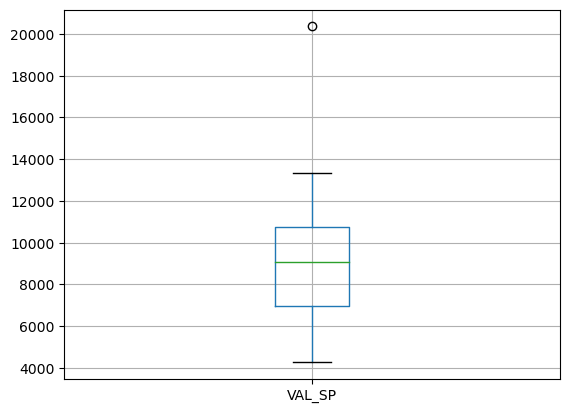

In [ ]:
#Carregar a base de dados contendo valores numéricos
base_dados = pd.read_excel('Base Processamento.xlsx', sheet_name='base_amostra')
base_dados['VAL_SP'].fillna(base_dados['VAL_SP'].mean(),inplace=True)
base_dados[['VAL_SP']].boxplot()

In [ ]:
import numpy as np

# Calcula o quartil inferior e superior
q1 = np.percentile(base_dados['VAL_SP'], 25)
q3 = np.percentile(base_dados['VAL_SP'], 75)

In [ ]:
# Calcula o IQQ
iqq = q3 - q1

# Define o limite inferior e superior para remover outliers
limite_inferior = q1 - 1.5 * iqq
limite_superior = q3 + 1.5 * iqq

print('Limite Inferior: ',limite_inferior)
print('Limite Superior',limite_superior)

Limite Inferior:  1362.145113636364
Limite Superior 16364.131477272727


In [ ]:
# Filtra os valores fora do limite
base_filtrada = base_dados[(base_dados['VAL_SP'] > limite_inferior) & (base_dados['VAL_SP'] < limite_superior)]
pd.DataFrame(base_filtrada['VAL_SP']).boxplot()

<AxesSubplot:>

Além dessa abordagem, é possível tratar os valores outliers da seguinte forma:

- **Seleção manual**, filtrando os dados que devem fazer parte da análise.
- **Análise Estatística**: Utilizando os desvios ou Z-Score
- **Algoritmos**: É possível utilizar algoritmos como por exemplo o isolation forest que pode identificar os valores mais isolados de uma base de dados.

Apenas devemos levar em consideração, que para cada técnica, é necessário verificar se é a mais adequada para a abordagem a ser utilizada

Para mais funções de processamento de tratamento dos dados, acesse a documentação do sklearn em: [module-sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)